# Lab 2: Correlation Chart, Random Walk Theory and Monte Carlo Simulation

In [1]:
# Import Required Packages

import numpy as np
import pandas as pd
import pandas_datareader as web
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn

1.	You are required to choose 5 stocks (publicly traded) and produce a stock correlation chart
-	Starting data: 2016.01.01
-	Explain what the chart is telling you and how they can help you to formulate your portfolio strategy (maximum 1 paragraph in python report format)


In [2]:
# set up start data & the symbols for the stocks

start = datetime(2016, 1, 1)
symbols_list = ['EL', 'GE', 'TSLA', 'SBUX', 'ADDYY']

In [3]:
# Let's set up an empty array to store the prices that we are pulling from Yahooo Finance

symbols=[]

for ticker in symbols_list: 
    r = web.DataReader(ticker, 'yahoo', start)

# add a symbol column
    r['Symbol'] = ticker 
    symbols.append(r)
    
# Let's load them into the dataframe

df = pd.concat(symbols)
df = df.reset_index()
df = df[['Date', 'Adj Close', 'Symbol']]
df_pivot = df.pivot('Date','Symbol','Adj Close').reset_index()
df_pivot.head()

Symbol,Date,ADDYY,EL,GE,SBUX,TSLA
0,2016-01-04,42.545609,83.035797,26.312775,53.812042,223.410004
1,2016-01-05,41.939724,83.797508,26.338476,54.172268,223.429993
2,2016-01-06,41.262562,81.017258,25.918644,53.691975,219.039993
3,2016-01-07,40.817055,79.341507,24.821918,52.361908,215.649994
4,2016-01-08,40.166622,78.855919,24.376379,52.306492,211.000000


In [4]:
# Let's run the correlation between these stocks

corr_df = df_pivot.corr(method='pearson')


#Swapping Symbols as Index

corr_df.head().reset_index()
del corr_df.index.name
corr_df.head(7)

Symbol,ADDYY,EL,GE,SBUX,TSLA
ADDYY,1.000000,0.914278,-0.806457,0.785373,0.475834
EL,0.914278,1.000000,-0.879263,0.851612,0.404831
GE,-0.806457,-0.879263,1.000000,-0.634693,-0.330349
SBUX,0.785373,0.851612,-0.634693,1.000000,0.222117
TSLA,0.475834,0.404831,-0.330349,0.222117,1.000000


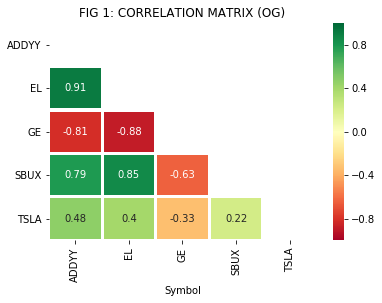

In [5]:
# Now Let's put the dataframe into a visual chart

canvas = np.zeros_like(corr_df)
canvas[np.triu_indices_from(canvas)] = True
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
#Visualization Code

seaborn.heatmap(corr_df, cmap='RdYlGn', annot = True, vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.1)
plt.title('FIG 1: CORRELATION MATRIX (OG)')
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [6]:
#From the correlation matrix above, we see that Estee Lauder (EL) and Addidas (ADDYY), have a very strong Positive correlation.
#General Electric (GE), has a strong negative correlation with Estee Lauder (EL) and Addidas (ADDYY). Tesla (TSLA) has pretty neutral correlation with the other four stocks.
#When GE is doing well the others tend to worse and vice versa
#when EL and ADDYY is doing well the others do well excluding GE and vice versa
# Rankings (desc) - EL & ADDY, EL & GE, El & SBUX, GE & ADDYY, SBUX & ADDY, GE & SBUX .....
# Take out EL and ADDY or at the very least keep only 1 (most likely ADDY because its less correlated with the other variable).
#Definately keep TSLA
#only keep TSLA, SBUX and GE in the same portfolio - See fig 2 and 3

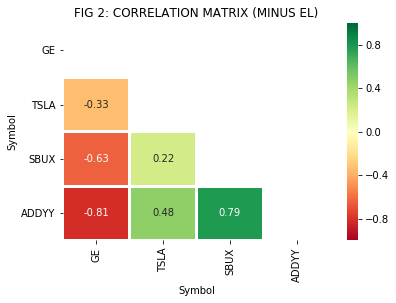

In [7]:
#NEW CORR with ADDY INCLUDED
corr_df1 = df_pivot[['GE', 'TSLA', 'SBUX', 'ADDYY']].corr(method='pearson')
canvas = np.zeros_like(corr_df1)
canvas[np.triu_indices_from(canvas)] = True
mask = np.zeros_like(corr_df1)
mask[np.triu_indices_from(mask)] = True
#Visualization Code

seaborn.heatmap(corr_df1, cmap='RdYlGn', annot = True, vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.1)
plt.title('FIG 2: CORRELATION MATRIX (MINUS EL)')
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

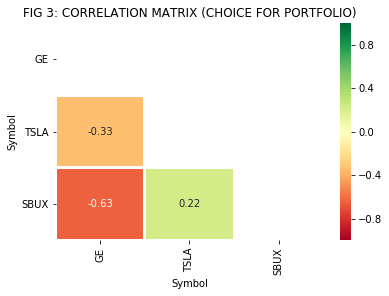

In [8]:
#NEW CORR without ADDY 
corr_df2 = df_pivot[['GE', 'TSLA', 'SBUX']].corr(method='pearson')
canvas = np.zeros_like(corr_df2)
canvas[np.triu_indices_from(canvas)] = True
mask = np.zeros_like(corr_df2)
mask[np.triu_indices_from(mask)] = True
#Visualization Code

seaborn.heatmap(corr_df2, cmap='RdYlGn', annot = True, vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.1)
plt.title('FIG 3: CORRELATION MATRIX (CHOICE FOR PORTFOLIO)')
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

2.	Produce a random walk theory price prediction based on your choice of a stock
-	Run the RWT 3 times see how the price prediction differs to one another


In [9]:
# The graph changes each time. There is no discernible pattern

In [10]:
# Monte Carlo Simulation & Random Walk Theory

import math
from scipy.stats import norm
from pandas_datareader import data

In [11]:
#download SJM price data into DataFrame
EL = data.DataReader('EL', 'yahoo',start='1/1/2016')

#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (EL.index[-1] - EL.index[0]).days
cagr = ((((EL['Adj Close'][-1]) / EL['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#create a series of percentage returns and calculate 
#the annual volatility of returns

EL['Returns'] = EL['Adj Close'].pct_change()
vol = EL['Returns'].std()*math.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 25.8%
Annual Volatility = 23.0%


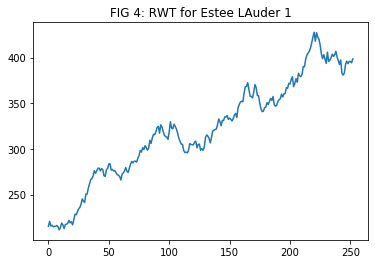

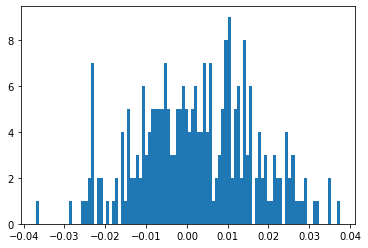

In [12]:
#Define Variables
S = EL['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.258 #Return
vol = 0.23 #Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#Generate Plots - price series and histogram of daily returns
plt.title('FIG 4: RWT for Estee LAuder 1')
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

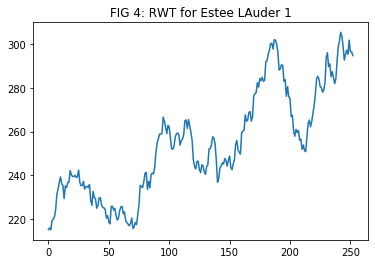

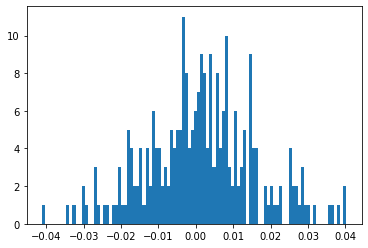

In [13]:
#Define Variables
S = EL['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.258 #Return
vol = 0.23 #Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#Generate Plots - price series and histogram of daily returns
plt.title('FIG 4: RWT for Estee LAuder 1')
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

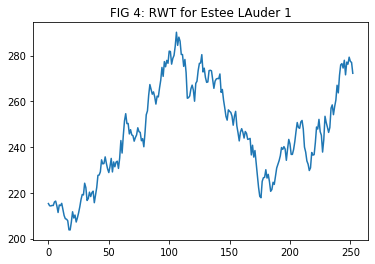

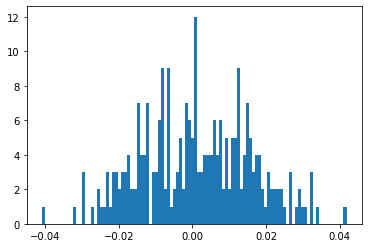

In [14]:
#Define Variables
S = EL['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.258 #Return
vol = 0.23 #Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#Generate Plots - price series and histogram of daily returns
plt.title('FIG 4: RWT for Estee LAuder 1')
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

3.	Produce a monte carlo simulation based on the same stock you chose for the RWT
-	What is the predicted average price of the stock? What are we assuming here?


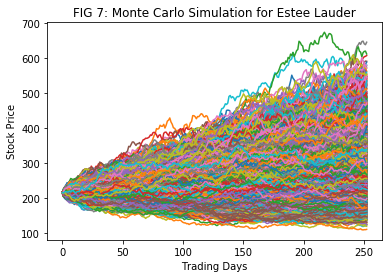

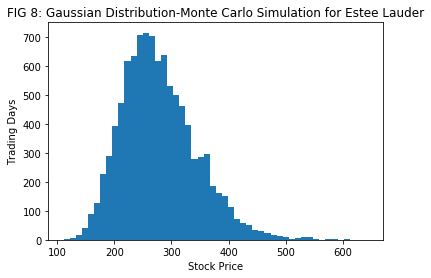

In [15]:
#set up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = EL['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.258#Return
vol = 0.23 #Volatility

#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])

#show the plot of multiple price series created above
plt.title('FIG 7: Monte Carlo Simulation for Estee Lauder')
plt.xlabel('Trading Days')
plt.ylabel('Stock Price')
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.title('FIG 8: Gaussian Distribution-Monte Carlo Simulation for Estee Lauder')
plt.ylabel('Trading Days')
plt.xlabel('Stock Price')
plt.hist(result,bins=50)
plt.show()

In [16]:
#use numpy mean function to calculate the mean of the result
print("The predicted average value of the stock price of EL can be",round(np.mean(result),2), "in one year.")
#we are assumming that the distribution of the mean across the monte carlo simulation is normal.


The predicted average value of the stock price of EL can be 278.7 in one year.


In [17]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

5% quantile = 185.1095594452809
95% quantile = 395.86687032817355
